In [1]:
import ROOT
from draw_funcs import draw_chi2_gaussian_sim, draw_1d_hist, draw_2d_hist2
from ROOT import TFile
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/08


In [2]:
entry = 6
nevents = 1000000
mfield = 1.3
input_path = "/var/kinfit/data/tr_ph_run049912.root"
output_path = "kinfit_gsim_kskpi_run049912.root"
# good 6
# bad 39
# ugly 44

In [3]:
 %%bash
    rm -f *.root

In [4]:
ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/gaussgen/share/gaussgen/rootlogon.C")')

0

(int) 0


In [5]:
ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/kfcmd/share/kfcmd/rootlogon.C")')

0

(int) 0


In [6]:
ROOT.gInterpreter.ProcessLine('.L TrPh.C++')

0

Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/minor_revision/gaussian_sim/kskpi/good/TrPh_C.so


In [7]:
ROOT.gInterpreter.ProcessLine('TFile fl("{}", "read")'.format(input_path))

140453726625832

(TFile &) Name: /var/kinfit/data/tr_ph_run049912.root Title: 


In [8]:
ROOT.gInterpreter.ProcessLine('TrPh a(tr_ph)')

140452641456128

(TrPh &) @0x7fbdadcd4000


In [9]:
ROOT.gInterpreter.ProcessLine('a.setNEvents({})'.format(nevents))

0

In [10]:
ROOT.gInterpreter.ProcessLine('a.setEntry({})'.format(entry))

0

In [11]:
ROOT.gInterpreter.ProcessLine('a.Loop("{output_path}", {mfield})'.format(output_path=output_path, mfield=mfield))

0

sim hypo: KsK+pi-


In [12]:
ROOT.gInterpreter.ProcessLine('fl.Close()')

0

In [13]:
fl = TFile.Open(output_path, 'read')

In [14]:
ROOT.gInterpreter.ProcessLine('''double fcn(double *x, double *p) {
                                      return 0.546875 * p[0] * ROOT::Math::chisquared_pdf(x[0], p[1]);}''')

0

In [15]:
ROOT.gInterpreter.ProcessLine('TF1 f0("f0", fcn, 0, 50, 2)')

140453726626704

(TF1 &) Name: f0 Title: f0


In [16]:
ROOT.gInterpreter.ProcessLine('f0.SetNpx(10000)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(0, 1.e+6)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(1, 9)')

0

In [17]:
ROOT.gInterpreter.ProcessLine('kf_chi2->Fit(&f0)')

94793542499344

 FCN=76.4681 FROM MIGRAD    STATUS=CONVERGED      50 CALLS          51 TOTAL
                     EDM=1.69063e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.99926e+05   9.99966e+02   4.23486e+00   3.06637e-09
   2  p1           1.00166e+01   4.26180e-03   1.83150e-05  -4.25425e-03
(TFitResultPtr) <nullptr TFitResult>


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


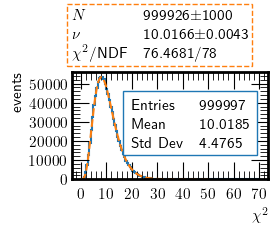

In [18]:
draw_chi2_gaussian_sim("kf_chi2", "f0", xlabel=r'$\chi^2$', x_max=50.,
                       ylabel='events',
                    fraction=0.47,
                    info_coords=(0.3, 0.3),
                    dh=0.8, dw=-0.3,
                    h_y=10000, h_x=10)
plt.savefig('kf_chi2_gsim_kskpi_good.eps', bbox_inches='tight')

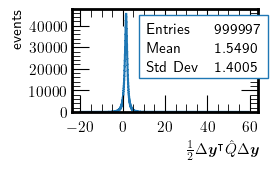

In [19]:
draw_1d_hist("qhist", 
             xlabel=r'$\frac{1}{2}\Delta\bm{y}^{\intercal}\hat{Q}\Delta\bm{y}$',
            fraction=0.47,
             ylabel='events',
            info_coords=(0.4, 0.4),
            h_y=10000, h_x=20)
plt.gcf().subplots_adjust(bottom=0.285)
plt.gcf().subplots_adjust(left=0.235)
plt.savefig('qhalf_gsim_kskpi_good.eps')

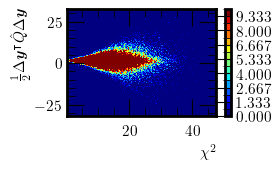

In [20]:
import matplotlib.colors as colors
import numpy as np
bounds = np.linspace(0, 10, 16)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
draw_2d_hist2('chi2_vs_q', 
              xlabel=r'$\chi^2$', 
              ylabel=r'$\frac{1}{2}\Delta\bm{y}^{\intercal}\hat{Q}\Delta\bm{y}$', 
              fraction=0.47,
              bins=(200, 200),
              norm=norm,
              clip=((0, 400.), (-400., 400.)))
plt.gcf().subplots_adjust(left=0.235)
plt.gcf().subplots_adjust(bottom=0.26)
plt.savefig('qhalf_vs_chi2_gsim_kskpi_good.eps')

In [21]:
from ROOT import TCanvas

In [22]:
fl.ls()

TFile**		kinfit_gsim_kskpi_run049912.root	
 TFile*		kinfit_gsim_kskpi_run049912.root	
  OBJ: TH1F	kf_chi2	 : 0 at: 0x5636d3bd4ab0
  OBJ: TH1F	qhist	 : 0 at: 0x5636cfaa0360
  OBJ: TH2F	chi2_vs_q	 : 0 at: 0x5636cfb6cbf0
  KEY: TH1F	kf_chi2;1	
  KEY: TH1F	qhist;1	
  KEY: TH2F	chi2_vs_q;1	
  KEY: TH1F	sigma_x_vtx0;1	
  KEY: TH1F	sigma_y_vtx0;1	
  KEY: TH1F	sigma_z_vtx0;1	
  KEY: TH1F	sigma_x_vtx1;1	
  KEY: TH1F	sigma_y_vtx1;1	
  KEY: TH1F	sigma_z_vtx1;1	
  KEY: TH1F	vtx0_dx;1	
  KEY: TH1F	vtx0_dy;1	
  KEY: TH1F	vtx0_dz;1	
  KEY: TH1F	vtx1_dx;1	
  KEY: TH1F	vtx1_dy;1	
  KEY: TH1F	vtx1_dz;1	
  KEY: TH1F	vtx0_dx_pull;1	
  KEY: TH1F	vtx0_dy_pull;1	
  KEY: TH1F	vtx0_dz_pull;1	
  KEY: TH1F	vtx1_dx_pull;1	
  KEY: TH1F	vtx1_dy_pull;1	
  KEY: TH1F	vtx1_dz_pull;1	


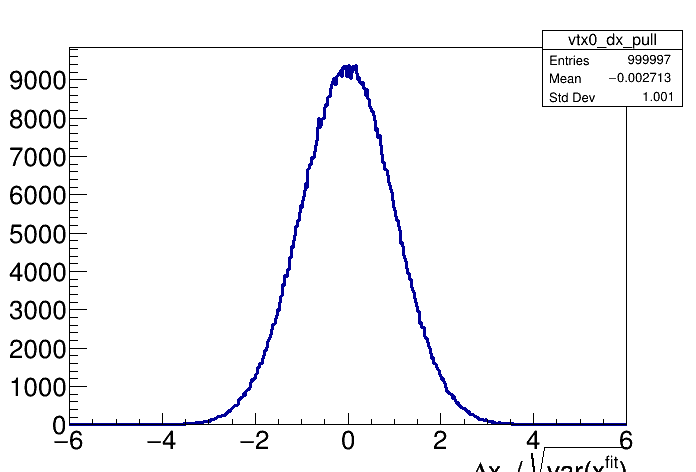

In [23]:
cnv = TCanvas()
fl.vtx0_dx_pull.Draw()
hist = fl.vtx0_dx_pull
hist.SetLineWidth(3)
hist.GetXaxis().SetTitle("#Deltax_{1} / #sqrt{var(x^{fit}_{1})}")
hist.GetXaxis().SetTitleSize(0.06)
hist.GetXaxis().SetLabelSize(0.06)
hist.GetYaxis().SetTitle("events")
hist.GetYaxis().SetTitleSize(0.06)
hist.GetYaxis().SetLabelSize(0.06)
cnv.Draw()
# cnv.SaveAs('kskpi_vtxsigma_gaussian_sim_vtx0_dx_pull.root')

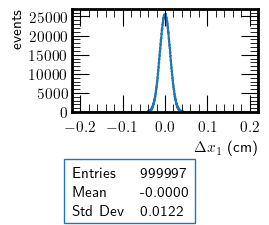

In [45]:
draw_1d_hist("vtx0_dx", 
             xlabel=r'$\Delta{x}_{1}$ (cm)',
            fraction=0.47,
             ylabel='events',
            info_coords=(0.0, -1.0),
            h_y=5000, h_x=0.1)
plt.gcf().subplots_adjust(bottom=0.285)
plt.gcf().subplots_adjust(left=0.235)

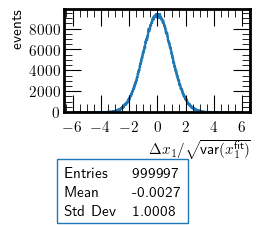

In [68]:
draw_1d_hist("vtx0_dx_pull", 
             xlabel=r'$\Delta{x}_{1} / \sqrt{\text{var}(x^{\text{fit}}_{1})}$',
            fraction=0.47,
             ylabel='events',
            info_coords=(0.0, -1.0),
            h_y=2000, h_x=2)
plt.gcf().subplots_adjust(bottom=0.285)
plt.gcf().subplots_adjust(left=0.235)
plt.savefig("pull_x1_simhypo_xkpi_gauss_sim_good.eps", bbox_inches='tight')

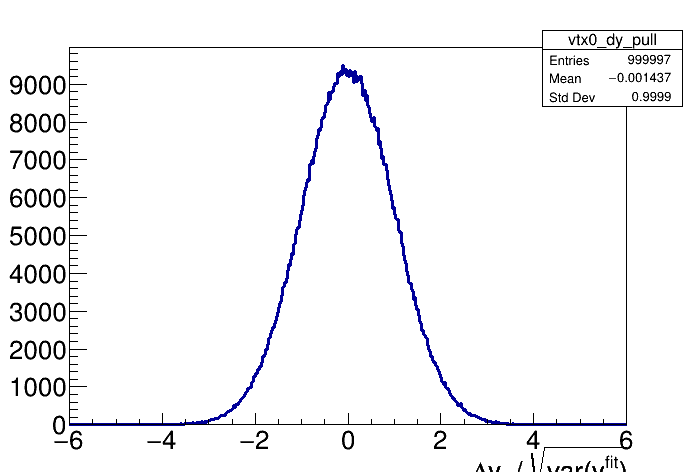

In [26]:
cnv = TCanvas()
fl.vtx0_dy_pull.Draw()
hist = fl.vtx0_dy_pull
hist.SetLineWidth(3)
hist.GetXaxis().SetTitle("#Deltay_{1} / #sqrt{var(y^{fit}_{1})}")
hist.GetXaxis().SetTitleSize(0.06)
hist.GetXaxis().SetLabelSize(0.06)
hist.GetYaxis().SetTitle("events")
hist.GetYaxis().SetTitleSize(0.06)
hist.GetYaxis().SetLabelSize(0.06)
cnv.Draw()
# cnv.SaveAs('kskpi_vtxsigma_gaussian_sim_vtx0_dy_pull.root')

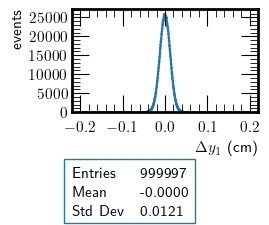

In [49]:
draw_1d_hist("vtx0_dy", 
             xlabel=r'$\Delta{y}_{1}$ (cm)',
            fraction=0.47,
             ylabel='events',
            info_coords=(0.0, -1.0),
            h_y=5000, h_x=0.1)
plt.gcf().subplots_adjust(bottom=0.285)
plt.gcf().subplots_adjust(left=0.235)

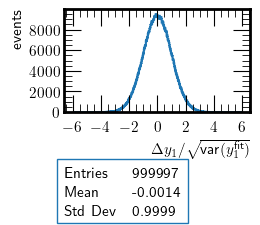

In [69]:
draw_1d_hist("vtx0_dy_pull", 
             xlabel=r'$\Delta{y}_{1} / \sqrt{\text{var}(y^{\text{fit}}_{1})}$',
            fraction=0.47,
             ylabel='events',
            info_coords=(0.0, -1.0),
            h_y=2000, h_x=2)
plt.gcf().subplots_adjust(bottom=0.285)
plt.gcf().subplots_adjust(left=0.235)
plt.savefig("pull_y1_simhypo_xkpi_gauss_sim_good.eps", bbox_inches='tight')

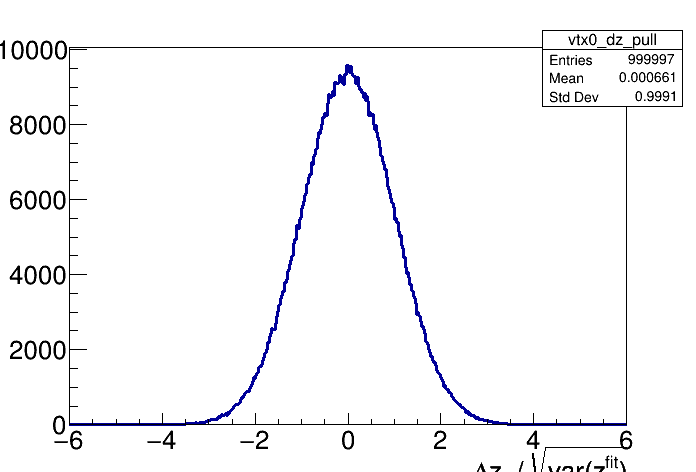

In [29]:
cnv0 = TCanvas()
fl.vtx0_dz_pull.Draw()
hist = fl.vtx0_dz_pull
hist.SetLineWidth(3)
hist.GetXaxis().SetTitle("#Deltaz_{1} / #sqrt{var(z^{fit}_{1})}")
hist.GetXaxis().SetTitleSize(0.06)
hist.GetXaxis().SetLabelSize(0.06)
hist.GetYaxis().SetTitle("events")
hist.GetYaxis().SetTitleSize(0.06)
hist.GetYaxis().SetLabelSize(0.06)
cnv0.Draw()
# cnv0.SaveAs('kskpi_vtxsigma_gaussian_sim_vtx0_dz_pull.root')

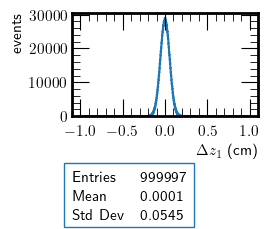

In [55]:
draw_1d_hist("vtx0_dz", 
             xlabel=r'$\Delta{z}_{1}$ (cm)',
            fraction=0.47,
             ylabel='events',
            info_coords=(0.0, -1.0),
            h_y=10000, h_x=0.5)
plt.gcf().subplots_adjust(bottom=0.285)
plt.gcf().subplots_adjust(left=0.235)

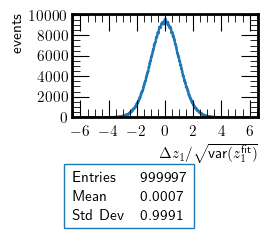

In [70]:
draw_1d_hist("vtx0_dz_pull", 
             xlabel=r'$\Delta{z}_{1} / \sqrt{\text{var}(z^{\text{fit}}_{1})}$',
            fraction=0.47,
             ylabel='events',
            info_coords=(0.0, -1.0),
            h_y=2000, h_x=2)
plt.gcf().subplots_adjust(bottom=0.285)
plt.gcf().subplots_adjust(left=0.235)
plt.savefig("pull_z1_simhypo_xkpi_gauss_sim_good.eps", bbox_inches='tight')

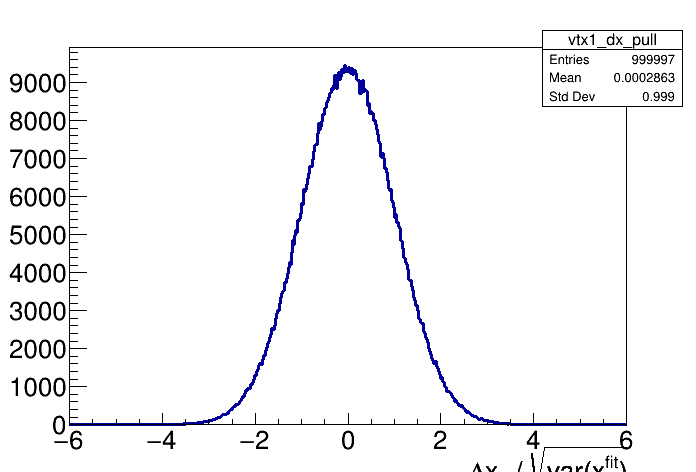

In [32]:
cnv1 = TCanvas()
fl.vtx1_dx_pull.Draw()
hist = fl.vtx1_dx_pull
hist.SetLineWidth(3)
hist.GetXaxis().SetTitle("#Deltax_{2} / #sqrt{var(x^{fit}_{2})}")
hist.GetXaxis().SetTitleSize(0.06)
hist.GetXaxis().SetLabelSize(0.06)
hist.GetYaxis().SetTitle("events")
hist.GetYaxis().SetTitleSize(0.06)
hist.GetYaxis().SetLabelSize(0.06)
cnv1.Draw()
# cnv1.SaveAs('kskpi_vtxsigma_gaussian_sim_vtx1_dx_pull.root')

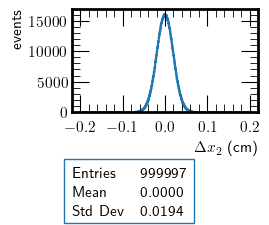

In [58]:
draw_1d_hist("vtx1_dx", 
             xlabel=r'$\Delta{x}_{2}$ (cm)',
            fraction=0.47,
             ylabel='events',
            info_coords=(0.0, -1.0),
            h_y=5000, h_x=0.1)
plt.gcf().subplots_adjust(bottom=0.285)
plt.gcf().subplots_adjust(left=0.235)

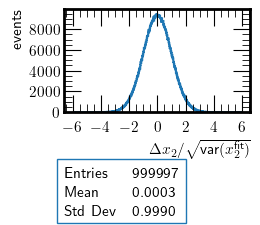

In [71]:
draw_1d_hist("vtx1_dx_pull", 
             xlabel=r'$\Delta{x}_{2} / \sqrt{\text{var}(x^{\text{fit}}_{2})}$',
            fraction=0.47,
             ylabel='events',
            info_coords=(0.0, -1.0),
            h_y=2000, h_x=2)
plt.gcf().subplots_adjust(bottom=0.285)
plt.gcf().subplots_adjust(left=0.235)
plt.savefig("pull_x2_simhypo_xkpi_gauss_sim_good.eps", bbox_inches='tight')

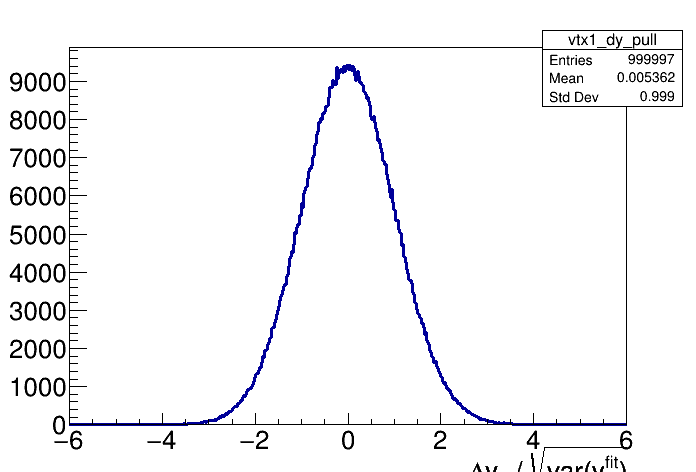

In [35]:
cnv2 = TCanvas()
fl.vtx1_dy_pull.Draw()
hist = fl.vtx1_dy_pull
hist.SetLineWidth(3)
hist.GetXaxis().SetTitle("#Deltay_{2} / #sqrt{var(y^{fit}_{2})}")
hist.GetXaxis().SetTitleSize(0.06)
hist.GetXaxis().SetLabelSize(0.06)
hist.GetYaxis().SetTitle("events")
hist.GetYaxis().SetTitleSize(0.06)
hist.GetYaxis().SetLabelSize(0.06)
cnv2.Draw()
# cnv2.SaveAs('kskpi_vtxsigma_gaussian_sim_vtx1_dy_pull.root')

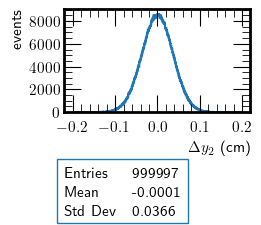

In [62]:
draw_1d_hist("vtx1_dy", 
             xlabel=r'$\Delta{y}_{2}$ (cm)',
            fraction=0.47,
             ylabel='events',
            info_coords=(0.0, -1.0),
            h_y=2000, h_x=0.1)
plt.gcf().subplots_adjust(bottom=0.285)
plt.gcf().subplots_adjust(left=0.235)

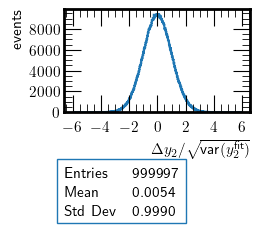

In [72]:
draw_1d_hist("vtx1_dy_pull", 
             xlabel=r'$\Delta{y}_{2} / \sqrt{\text{var}(y^{\text{fit}}_{2})}$',
            fraction=0.47,
             ylabel='events',
            info_coords=(0.0, -1.0),
            h_y=2000, h_x=2)
plt.gcf().subplots_adjust(bottom=0.285)
plt.gcf().subplots_adjust(left=0.235)
plt.savefig("pull_y2_simhypo_xkpi_gauss_sim_good.eps", bbox_inches='tight')

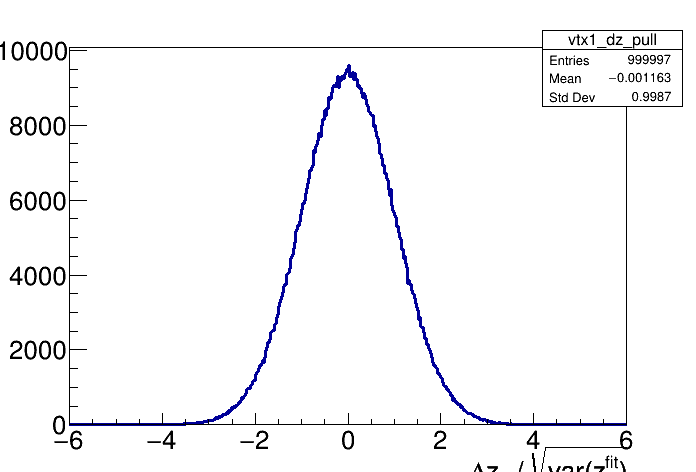

In [38]:
cnv3 = TCanvas()
fl.vtx1_dz_pull.Draw()
cnv3.Draw()
hist = fl.vtx1_dz_pull
hist.SetLineWidth(3)
hist.GetXaxis().SetTitle("#Deltaz_{2} / #sqrt{var(z^{fit}_{2})}")
hist.GetXaxis().SetTitleSize(0.06)
hist.GetXaxis().SetLabelSize(0.06)
hist.GetYaxis().SetTitle("events")
hist.GetYaxis().SetTitleSize(0.06)
hist.GetYaxis().SetLabelSize(0.06)
# cnv3.SaveAs('kskpi_vtxsigma_gaussian_sim_vtx1_dz_pull.root')

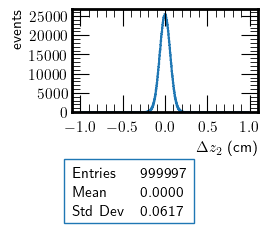

In [66]:
draw_1d_hist("vtx1_dz", 
             xlabel=r'$\Delta{z}_{2}$ (cm)',
            fraction=0.47,
             ylabel='events',
            info_coords=(0.0, -1.0),
            h_y=5000, h_x=0.5)
plt.gcf().subplots_adjust(bottom=0.285)
plt.gcf().subplots_adjust(left=0.235)

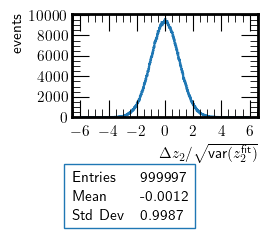

In [73]:
draw_1d_hist("vtx1_dz_pull", 
             xlabel=r'$\Delta{z}_{2} / \sqrt{\text{var}(z^{\text{fit}}_{2})}$',
            fraction=0.47,
             ylabel='events',
            info_coords=(0.0, -1.0),
            h_y=2000, h_x=2)
plt.gcf().subplots_adjust(bottom=0.285)
plt.gcf().subplots_adjust(left=0.235)
plt.savefig("pull_z2_simhypo_xkpi_gauss_sim_good.eps", bbox_inches='tight')

In [41]:
# fl.Close()